The following code block includes: 
1. importing the required packages
2. creating api request
    2a. The variables piece the url together depending on what we are looking for
    In this case I wanted to use the characteristics of buisiness dataset
    I wanted to specifically look at the # of employees for the US based on owner sex, and ethinic group
3. The last portion is for putting the api call into a pandas dataframe and checking it worked properly
    3a. Since the main data I wanted to look at was the number of employees, I had to cast the column as an int type
4. Finally filtering down to the non hispanic owners only out of the dataset

In [1]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#companysumurl = 'https://api.census.gov/data/2018/abscs'
#mykey = '91230ee74109c3ff9afff2322b4e9d4a2be6c874***'

host = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscb'
base_url1 = '/'.join([host,year,dataset])
predicates = {}
get_vars = ['NAME','EMP','SEX','ETH_GROUP']
col_names = ['Name','#employees','sexlabel','EthinicGroup','state']
predicates['get'] =','.join(get_vars)
predicates['for']= 'us'
r =requests.get(base_url1, params = predicates)
print(r)

df = pd.DataFrame(columns=col_names,data = r.json()[1:])
print(df.info())
df['#employees'] = df['#employees'].astype(int)
print(df.head(200))
nhemp = df[df.EthinicGroup == '029']
print(nhemp.head(30))

<Response [200]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          16 non-null     object
 1   #employees    16 non-null     object
 2   sexlabel      16 non-null     object
 3   EthinicGroup  16 non-null     object
 4   state         16 non-null     object
dtypes: object(5)
memory usage: 768.0+ bytes
None
             Name  #employees sexlabel EthinicGroup state
0   United States   128196406      001          001     1
1   United States    10149257      002          001     1
2   United States    45346405      003          001     1
3   United States     7970121      004          001     1
4   United States     2972140      001          020     1
5   United States      722654      002          020     1
6   United States     1957790      003          020     1
7   United States      291696      004          020     1
8   United Stat

This block is to create meaningful labels for the graphs following, by putting the codes into a dataframe and then inner joining them to get a description instead of just a code for sex.
I then filtered the data down to only include the Number of employees and the sex description 

In [2]:
col_names = ['sexlabel','Description']
codes = [['001','Total'],['002','Female'],['003','Male'],['004','Equal male to female']]
sexcodes = pd.DataFrame(columns = col_names,data = codes)
nhemp = nhemp.merge(sexcodes, how='inner',on='sexlabel')
nhemp = nhemp[['#employees','Description']]

The following cell creates the bar graph for Number of employees by gender of Non-Hispanic owned businesses in matplotlib.

,#employees,Description
0,60007007,Total
1,9407871,Female
2,43241670,Male
3,7357466,Equal male to female


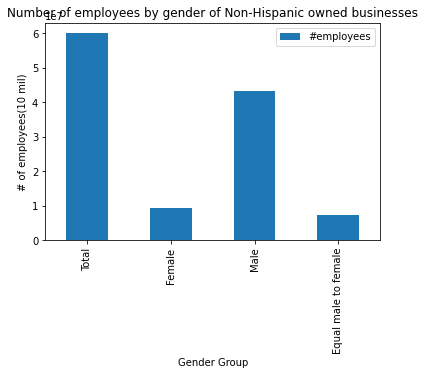

In [3]:
ax = nhemp.plot(title = 'Number of employees by gender of Non-Hispanic owned businesses',kind='bar',x='Description')
ax.set_xlabel('Gender Group')
ax.set_ylabel('# of employees(10 mil)')
nhemp.head()

This next cell shows the similiar process of filtering the main dataset down to only include Businesses owned by Hispanic, and then merging the sexlabel dataframe again to get readable column names

In [4]:
hemp = df[df.EthinicGroup == '020']

hemp = hemp.merge(sexcodes, how='inner',on='sexlabel')
hemp.head()

,Name,#employees,sexlabel,EthinicGroup,state,Description
0,United States,2972140,001,020,1,Total
1,United States,722654,002,020,1,Female
2,United States,1957790,003,020,1,Male
3,United States,291696,004,020,1,Equal male to female


This cell is for creating the bar graph for Number of employees by gender of Hispanic owned businesses in matplotlib

Text(0, 0.5, '# of employees(millions)')

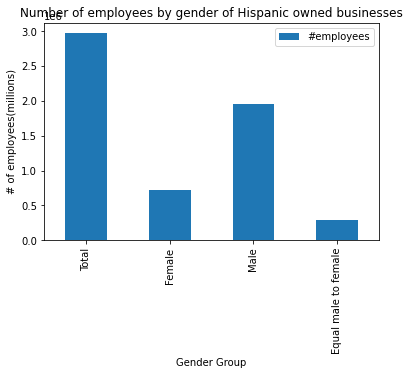

In [5]:
ax = hemp.plot(title = 'Number of employees by gender of Hispanic owned businesses',kind='bar',x='Description')
ax.set_xlabel('Gender Group')
ax.set_ylabel('# of employees(millions)')

This cells makes a similiar graph as above but just made by seaborn instead of matplotlib

Text(0.5, 1.0, 'Number of employees by gender of Hispanic owned businesses')

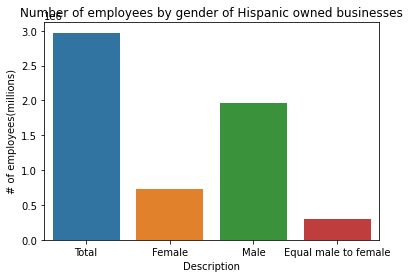

In [6]:
ax = sns.barplot(data = hemp,x='Description',y='#employees')
ax.set_ylabel('# of employees(millions)')
ax.set_title('Number of employees by gender of Hispanic owned businesses')

This cell below contains the api call for getting the techuse and employee count from the Technological Characteristics of Businesses dataset. 
It uses similiar code to the first api call, but calling different variables.

I created a new pandas dataframe in order to store the data.
I also had to again cast the # of employees as int so that I could use it in the graphing functions
I took only the first 5 enteries of the dataframe because I was only looking to view use of ai reports, and those were the first enteries

I then created another pandas dataframe for the tech use decriptions to better label the codes.

In [7]:

dataset = 'abstcb'
base_url1 = '/'.join([host,year,dataset])
predicates = {}
get_vars = ['NAME','TECHUSE','EMP']
col_names = ['Name','Tech_use','#employees','state']
predicates['get'] =','.join(get_vars)
predicates['for']= 'us'
r =requests.get(base_url1, params = predicates)
print(r)

df2 = pd.DataFrame(columns=col_names,data = r.json()[1:])
df2['#employees'] = df2['#employees'].astype(int)
print(df2.info())
df2.head(25)
aiuse = df2[0:5]
aiuse.head()

col_names = ['Tech_use','Description']
codes = [['T1E03B01','No AI'],['T1E03B02','Tested AI'],['T1E03B03','Low AI'],['T1E03B04','Moderate AI'],['T1E03B05','High AI']]
aicodes = pd.DataFrame(columns = col_names,data = codes)
aiuse.head()

<Response [200]>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        40 non-null     object
 1   Tech_use    40 non-null     object
 2   #employees  40 non-null     int32 
 3   state       40 non-null     object
dtypes: int32(1), object(3)
memory usage: 1.2+ KB
None


,Name,Tech_use,#employees,state
0,United States,T1E03B01,66663253,1
1,United States,T1E03B02,2429791,1
2,United States,T1E03B03,7761161,1
3,United States,T1E03B04,3405478,1
4,United States,T1E03B05,704443,1


This cell was for adding the descriptions column to the ai table and then dropping the other unnessecary columns

In [8]:
aiuse = aiuse.merge(aicodes, how='inner',on='Tech_use')
aiuse = aiuse[['#employees','Description']]

The following cell was for seeing the number of employees and the level of ai use at their firm on a bar graph in seaborn

Text(0.5, 1.0, 'Num emplopyees of companys by AI use')

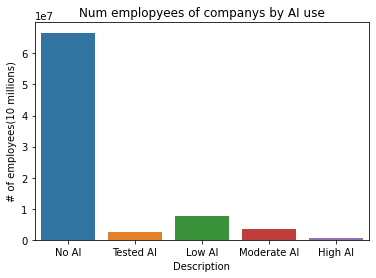

In [9]:
ax = sns.barplot(data = aiuse,x='Description',y='#employees')
ax.set_ylabel('# of employees(10 millions)')
ax.set_title('Num emplopyees of companys by AI use')

Since the graph above is heavily shown to employees working at a firm that uses no ai, I wanted to have another graph that just showed the level of ai use of businesses that used ai at all.
To do this I dropped the first index which was the row for no ai use and then ran the same graphing function on the new dataframe.

Text(0.5, 1.0, 'Num emplopyees of companys by AI use')

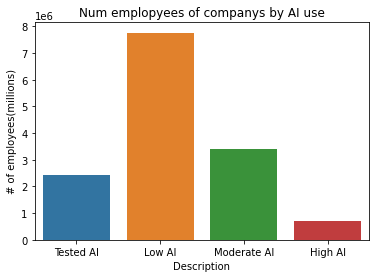

In [10]:

aitotal = aiuse.drop(index = 0)
aitotal.head()
ax = sns.barplot(data = aitotal,x='Description',y='#employees')
ax.set_ylabel('# of employees(millions)')
ax.set_title('Num emplopyees of companys by AI use')